In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager
import sklearn.metrics as metrics

In [3]:
books = pd.read_csv('../Book_reviews/BX-Books.csv', sep = ';', error_bad_lines=False, encoding='latin-1')
users = pd.read_csv('../Book_reviews/BX-Users.csv', sep = ';', error_bad_lines=False, encoding='latin-1')
ratings = pd.read_csv('../Book_reviews/BX-Book-Ratings.csv', sep = ';', error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: Dtype

In [4]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [5]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [8]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                2002     Oxford University Press  
1  Richard Bruce Wright                2001       HarperFlamingo Canada  
2          Carlo D'Este                1991             HarperPerennial  
3      Gina Bari Kolata                1999        Farrar Straus Giroux  
4       E. J. W. Barber                1999  W. W. Norton &amp; Company

In [9]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [10]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-10-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [11]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
books.loc[books['Year-Of-Publication']=='DK Publishing Inc']

ISBN  \
209538  078946697X   
221678  0789466953   

                                                                                                         Book-Title  \
209538  DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"          
221678  DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"   

       Book-Author Year-Of-Publication  \
209538  2000        DK Publishing Inc    
221678  2000        DK Publishing Inc    

                                                           Publisher  
209538  http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg  
221678  http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg

In [13]:
books.loc[books['ISBN']== '0789466953', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN']== '0789466953', 'Book-Author'] = 'James Buckley'
books.loc[books['ISBN']== '0789466953', 'Publisher'] = 'DK Publishing Inc'
books.loc[books['ISBN']== '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [14]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [15]:
books.loc[books['ISBN']== '078946697X', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN']== '078946697X', 'Book-Author'] = 'Michael Teitelbaum'
books.loc[books['ISBN']== '078946697X', 'Publisher'] = 'DK Publishing Inc'
books.loc[books['ISBN']== '078946697X', 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [16]:
books.loc[books['Year-Of-Publication']=='Gallimard']

ISBN  \
220731  2070426769   

                                                                      Book-Title  \
220731  Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"   

       Book-Author Year-Of-Publication  \
220731  2003        Gallimard            

                                                           Publisher  
220731  http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg

In [17]:
books.loc[books['ISBN']== '2070426769', 'Year-Of-Publication'] = 2003
books.loc[books['ISBN']== '2070426769', 'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books['ISBN']== '2070426769', 'Publisher'] = 'Gallimard'
books.loc[books['ISBN']== '2070426769', 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"

In [18]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors = 'coerce')

In [19]:
(books[books['Year-Of-Publication'] == 0].shape[0]/books.shape[0])*100

1.7017983490566035

In [20]:
books.loc[(books['Year-Of-Publication'] == 0 ) | (books['Year-Of-Publication'] >2006)].shape[0]

4641

In [21]:
books.loc[(books['Year-Of-Publication']>2006)| (books['Year-Of-Publication']==0), 'Year-Of-Publication'] = np.NAN

In [22]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [23]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

In [24]:
books.loc[books['Publisher'].isna(), 'Publisher'] = 'other'

In [25]:
books.loc[books['Publisher']=='other']

ISBN       Book-Title      Book-Author  Year-Of-Publication  \
128890  193169656X  Tyrant Moon      Elaine Corvidae  2002                  
129037  1931696993  Finders Keepers  Linnea Sinclair  2001                  

       Publisher  
128890  other     
129037  other

In [26]:
books.loc[128890,'Year-Of-Publication']

2002

In [27]:
users.shape

(278858, 3)

In [28]:
users.head()

User-ID                            Location   Age
0  1        nyc, new york, usa                 NaN  
1  2        stockton, california, usa           18.0
2  3        moscow, yukon territory, russia    NaN  
3  4        porto, v.n.gaia, portugal           17.0
4  5        farnborough, hants, united kingdom NaN

In [29]:
(users.Age.isna().sum())/users.Age.shape[0]

0.3971985741847105

In [30]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [31]:
users['User-ID'].values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [32]:
users.loc[(users.Age >90)| (users.Age <5), 'Age'] = np.NAN
users.Age = users.Age.fillna(users.Age.mean())

In [33]:
users.Age = users.Age.astype(np.int32)

In [34]:
users.Age.dtype

dtype('int32')

In [35]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [36]:
ratings.shape

(1149780, 3)

In [37]:
sparse=(users.shape[0])*(books.shape[0])

In [38]:
ratings.head()

User-ID        ISBN  Book-Rating
0  276725   034545104X  0          
1  276726   0155061224  5          
2  276727   0446520802  0          
3  276729   052165615X  3          
4  276729   0521795028  6

In [39]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [40]:
ratings_new.shape

(1031136, 3)

In [41]:
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]

In [42]:
print(ratings.shape)
ratings_new.shape

(1149780, 3)


(1031136, 3)

In [43]:
ratings_new

User-ID        ISBN  Book-Rating
0        276725   034545104X  0          
1        276726   0155061224  5          
2        276727   0446520802  0          
3        276729   052165615X  3          
4        276729   0521795028  6          
...         ...          ... ..          
1149774  276704   0876044011  0          
1149775  276704   1563526298  9          
1149776  276706   0679447156  0          
1149777  276709   0515107662  10         
1149778  276721   0590442449  10         

[1031136 rows x 3 columns]

In [44]:
sparsity = 1.0 - len(ratings_new)/float(sparse)
print('The sparsity level of Book Crossing dataset is '+ str(sparsity*100)+' %')

The sparsity level of Book Crossing dataset is 99.99863734155898 %


In [45]:
ratings.head()

User-ID        ISBN  Book-Rating
0  276725   034545104X  0          
1  276726   0155061224  5          
2  276727   0446520802  0          
3  276729   052165615X  3          
4  276729   0521795028  6

In [46]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [47]:
ratings_explicit = ratings_new[ratings_new['Book-Rating']!=0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [48]:
users_exp_ratings = users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings = users[users['User-ID'].isin(ratings_implicit['User-ID'])]

In [49]:
ratings_implicit.shape

(647294, 3)

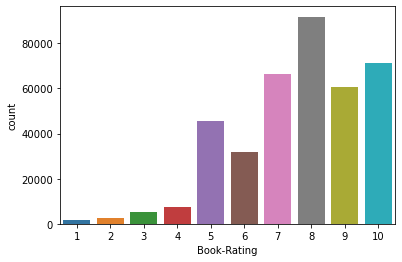

In [50]:
sns.countplot(data=ratings_explicit, x='Book-Rating')

Popularity Based Recommendation

In [51]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())

In [52]:
ratings_count

Book-Rating
ISBN                   
0000913154  8          
0001046438  9          
000104687X  6          
0001047213  9          
0001047973  18         
...        ..          
B0001FZGPI  7          
B0001FZGRQ  9          
B0001GMSV2  16         
B0001I1KOG  10         
B000234N3A  9          

[149836 rows x 1 columns]

In [53]:
top10 = ratings_count.sort_values('Book-Rating', ascending=False).head(10)
top10

Book-Rating
ISBN                   
0316666343  5787       
0385504209  4108       
0312195516  3134       
059035342X  2798       
0142001740  2595       
0971880107  2551       
0060928336  2524       
0446672211  2402       
0452282152  2219       
0671027360  2179

In [54]:
print("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'ISBN')

Following books are recommended


Book-Rating        ISBN  \
408   5787         0316666343   
748   4108         0385504209   
522   3134         0312195516   
2143  2798         059035342X   
356   2595         0142001740   
26    2551         0971880107   
1105  2524         0060928336   
706   2402         0446672211   
231   2219         0452282152   
118   2179         0671027360   

                                                            Book-Title  \
408   The Lovely Bones: A Novel                                          
748   The Da Vinci Code                                                  
522   The Red Tent (Bestselling Backlist)                                
2143  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
356   The Secret Life of Bees                                            
26    Wild Animus                                                        
1105  Divine Secrets of the Ya-Ya Sisterhood: A Novel                    
706   Where the Heart Is (Oprah's Book Club (Paperback))                 
231   Girl with a Pearl Earring                                          
118   Angels &amp; Demons                                                

          Book-Author  Year-Of-Publication               Publisher  
408   Alice Sebold     2002                 Little, Brown           
748   Dan Brown        2003                 Doubleday               
522   Anita Diamant    1998                 Picador USA             
2143  J. K. Rowling    1999                 Arthur A. Levine Books  
356   Sue Monk Kidd    2003                 Penguin Books           
26    Rich Shapero     2004                 Too Far                 
1105  Rebecca Wells    1997                 Perennial               
706   Billie Letts     1998                 Warner Books            
231   Tracy Chevalier  2001                 Plume Books             
118   Dan Brown        2001                 Pocket Star

Collaborative Filtering based Recommendation System

In [55]:
counts1 = ratings_explicit['User-ID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['User-ID'].isin(counts1[counts1>=100].index)]
counts = ratings_explicit['Book-Rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['Book-Rating'].isin(counts[counts>=100].index)]


In [56]:
ratings_explicit

User-ID        ISBN  Book-Rating
1456     277427   002542730X  10         
1458     277427   003008685X  8          
1461     277427   0060006641  10         
1465     277427   0060542128  7          
1474     277427   0061009059  9          
...         ...          ... ..          
1147587  275970   185649814X  7          
1147592  275970   1860462588  8          
1147599  275970   1886411077  6          
1147611  275970   3411086211  10         
1147615  275970   9626340762  8          

[103271 rows x 3 columns]

In [57]:
ratings_matrix = ratings_explicit.pivot(index = 'User-ID', columns='ISBN', values = 'Book-Rating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN     0000913154  0001046438  000104687X  0001047213  0001047973  \
User-ID                                                               
2033    NaN         NaN         NaN         NaN         NaN           
2110    NaN         NaN         NaN         NaN         NaN           
2276    NaN         NaN         NaN         NaN         NaN           
4017    NaN         NaN         NaN         NaN         NaN           
4385    NaN         NaN         NaN         NaN         NaN           

ISBN     000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
User-ID                                                              ...   
2033    NaN         NaN         NaN         NaN         NaN          ...   
2110    NaN         NaN         NaN         NaN         NaN          ...   
2276    NaN         NaN         NaN         NaN         NaN          ...   
4017    NaN         NaN         NaN         NaN         NaN          ...   
4385    NaN         NaN         NaN         NaN         NaN          ...   

ISBN     B000092Q0A  B00009EF82  B00009NDAN  B0000DYXID  B0000T6KHI  \
User-ID                                                               
2033    NaN         NaN         NaN         NaN         NaN           
2110    NaN         NaN         NaN         NaN         NaN           
2276    NaN         NaN         NaN         NaN         NaN           
4017    NaN         NaN         NaN         NaN         NaN           
4385    NaN         NaN         NaN         NaN         NaN           

ISBN     B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
User-ID                                                              
2033    NaN         NaN         NaN         NaN         NaN          
2110    NaN         NaN         NaN         NaN         NaN          
2276    NaN         NaN         NaN         NaN         NaN          
4017    NaN         NaN         NaN         NaN         NaN          
4385    NaN         NaN         NaN         NaN         NaN          

[5 rows x 66574 columns]

In [58]:
ratings_matrix = ratings_matrix.fillna(0)

In [59]:
ratings_matrix

ISBN     0000913154  0001046438  000104687X  0001047213  0001047973  \
User-ID                                                               
2033     0.0         0.0         0.0         0.0         0.0          
2110     0.0         0.0         0.0         0.0         0.0          
2276     0.0         0.0         0.0         0.0         0.0          
4017     0.0         0.0         0.0         0.0         0.0          
4385     0.0         0.0         0.0         0.0         0.0          
...      ...         ...         ...         ...         ...          
274061   0.0         0.0         0.0         0.0         0.0          
274301   0.0         0.0         0.0         0.0         0.0          
275970   0.0         0.0         0.0         0.0         0.0          
277427   0.0         0.0         0.0         0.0         0.0          
278418   0.0         0.0         0.0         0.0         0.0          

ISBN     000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
User-ID                                                              ...   
2033     0.0         0.0         0.0         0.0         0.0         ...   
2110     0.0         0.0         0.0         0.0         0.0         ...   
2276     0.0         0.0         0.0         0.0         0.0         ...   
4017     0.0         0.0         0.0         0.0         0.0         ...   
4385     0.0         0.0         0.0         0.0         0.0         ...   
...      ...         ...         ...         ...         ...         ...   
274061   0.0         0.0         0.0         0.0         0.0         ...   
274301   0.0         0.0         0.0         0.0         0.0         ...   
275970   0.0         0.0         0.0         0.0         0.0         ...   
277427   0.0         0.0         0.0         0.0         0.0         ...   
278418   0.0         0.0         0.0         0.0         0.0         ...   

ISBN     B000092Q0A  B00009EF82  B00009NDAN  B0000DYXID  B0000T6KHI  \
User-ID                                                               
2033     0.0         0.0         0.0         0.0         0.0          
2110     0.0         0.0         0.0         0.0         0.0          
2276     0.0         0.0         0.0         0.0         0.0          
4017     0.0         0.0         0.0         0.0         0.0          
4385     0.0         0.0         0.0         0.0         0.0          
...      ...         ...         ...         ...         ...          
274061   0.0         0.0         0.0         0.0         0.0          
274301   0.0         0.0         10.0        0.0         0.0          
275970   0.0         0.0         0.0         0.0         0.0          
277427   0.0         0.0         0.0         0.0         0.0          
278418   0.0         0.0         0.0         0.0         0.0          

ISBN     B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
User-ID                                                              
2033     0.0         0.0         0.0         0.0         0.0         
2110     0.0         0.0         0.0         0.0         0.0         
2276     0.0         0.0         0.0         0.0         0.0         
4017     0.0         0.0         0.0         0.0         0.0         
4385     0.0         0.0         0.0         0.0         0.0         
...      ...         ...         ...         ...         ...         
274061   0.0         0.0         0.0         0.0         0.0         
274301   0.0         0.0         0.0         0.0         0.0         
275970   0.0         0.0         0.0         0.0         0.0         
277427   0.0         0.0         0.0         0.0         0.0         
278418   0.0         0.0         0.0         0.0         0.0         

[449 rows x 66574 columns]

In [60]:
global k, metric
k = 5
metric = 'correlation'

1. Find the Similar users with KNN algorithm

In [61]:
def findksimilarusers(user_id,ratings,metric = metric, k = k):
    similarities = []
    indices = []
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    user_loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[user_loc, :].values.reshape(1,-1), n_neighbors=k+1)
    similarities = 1-distances.flatten()
    return similarities,indices

2. Get the ratings for the particular item that would be rated by the user with the help of similar users obtained

In [62]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k = k):
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices = findksimilarusers(user_id, ratings, metric = metric, k = k)
    mean_rating = ratings.iloc[user_loc].mean()
    sum_wtd = np.sum(similarities)-1
    product = 1
    wtd_sum = 0
    for i in range(len(indices.flatten())):
        if indices.flatten()[i]==user_loc:
            continue
        else:
            rating_diff = ratings.iloc[indices.flatten()[i], item_loc] - mean_rating
            product = rating_diff * similarities[i]
            wtd_sum = wtd_sum + product
    prediction = int(round(mean_rating + (wtd_sum/sum_wtd)))
    if prediction <=0:
        prediction = 1
    elif prediction >10:
        prediction = 10
    
#     print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    return prediction

3. Get the top 10 recommended items for the user based on his predicted ratings

In [63]:
def recommendItem(user_id, ratings):
    predictions = []
    if (user_id not in ratings.index.values) | (type(user_id) is not int ):
        print('The User doesnot exist in our System. Please choose valid user.')
    else:
        for i in range(ratings.shape[1]):
            if (ratings[str(ratings.columns[i])][user_id] !=0):
                predictions.append(predict_userbased(user_id, str(ratings.columns[i]), ratings, metric))
            else:
                predictions.append(-1)
            
#     prediction = pd.Series(predictions)
#     prediction = predictions.sort_values(ascending = False)
#     recommended = prediction[:10]
#     print('Following books are recommended...')
#     for i in range(len(recommended)):
#         print('{0}. {1}'.format(i+1, books['Book-Title'] recommended.index[i].encode('utf-8')]))
    return predictions

In [69]:
recommendItem(274301, ratings_matrix)

KeyboardInterrupt: 

Item Based

In [65]:
def findksimilaritems(item_id,ratings,metric = metric, k = k):
    similarities = []
    indices = []
    ratings = ratings.T
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    item_loc = ratings.index.get_loc(item_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[item_loc, :].values.reshape(1,-1), n_neighbors=k+1)
    similarities = 1-distances.flatten()
    return similarities,indices

In [66]:
def predict_itembased(user_id, item_id, ratings, metric = metric, k = k):
    prediction = wtd_sum = 0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices = findksimilaritems(item_id, ratings)
    sum_wtd = np.sum(similarities)-1
    product = 1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]==item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]]* (similarities[i])
            wtd_sum = wtd_sum + product
    prediction = int(round(wtd_sum/sum_wtd))
    if prediction <= 0:
        prediction = 1
    elif prediction > 10:
        prediction = 10
#     print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))
    return prediction

In [67]:
# prediction = predict_itembased(11676,'0001056107', ratings_matrix)

In [68]:
def recommendItembased(user_id, ratings, metric = metric):
    if (user_id not in ratings.index.values) | (type(user_id) is not int):
        print('The User doesnot exist in our System. Please choose valid user.')
    else:
        prediction = []
        for i in range(ratings.shape[1]):
            if (ratings[str(ratings.columns[i])][user_id] !=0):
                prediction.append(predict_itembased(user_id, str(ratings.columns[i]), ratings, metric))
                
            else:
                prediction.append(-1)
            
    prediction = pd.Series(prediction)
    prediction = prediction.sort_values(ascending = False)
    recommended = prediction[:10]
    print('Following books are recommended...')
    for i in range(len(recommended)):
        print('{0}. {1}'.format(i+1, books['Book-Title'][recommended.index[i]].encode('utf-8')))

In [70]:
recommendItembased(4385, ratings_matrix)

Following books are recommended...
1. b'My Wicked Wicked Ways'
2. b'Equal Rites (Discworld Novels (Paperback))'
3. b'Outerbridge Reach'
4. b'Wolfpointe'
5. b'A Nest of Ninnies'
6. b'A Bitter Legacy'
7. b'A Hymn Before Battle'
8. b'Thomas the Rhymer'
9. b'Wege zum Ruhm: 13 Hilfestellungen f\xc3\x83\xc2\xbcr junge K\xc3\x83\xc2\xbcnstler und 1 Warnung'
10. b"Love In Bloom's"
